In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
print(os.getcwd())

d:\MTU\_Project_Grunt_Work\Analysis_ReSized


In [11]:
# Function to show an image using pyplot
def show_img(img, size=12, title=None):
  fig = plt.gcf()
  fig.set_size_inches(size, size)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

In [3]:
# df = pd.read_csv('labelled_images_just_sipa2.txt', sep="\t", usecols=["image_file", "seen_data_numeric"])
df = pd.read_csv('labelled_images_just_sipa2.txt', sep="\t", header=None)

df.columns = ["image_file", "seen_data_numeric", "fld3", "fld4"]

df

,image_file,seen_data_numeric,fld3,fld4
0,.\sipaimages\2\1.jpg,5679,NaN,NaN
1,.\sipaimages\2\10.jpg,2244,NaN,NaN
2,.\sipaimages\2\11.jpg,2244,NaN,NaN
3,.\sipaimages\2\12.jpg,2244,NaN,NaN
4,.\sipaimages\2\13.jpg,7244,NaN,NaN
...,...,...,...,...
160,.\sipaimages\2\5.jpg,3456,NaN,NaN
161,.\sipaimages\2\6.jpg,6543,NaN,NaN
162,.\sipaimages\2\7.jpg,1278,NaN,NaN
163,.\sipaimages\2\8.jpg,1279,NaN,NaN


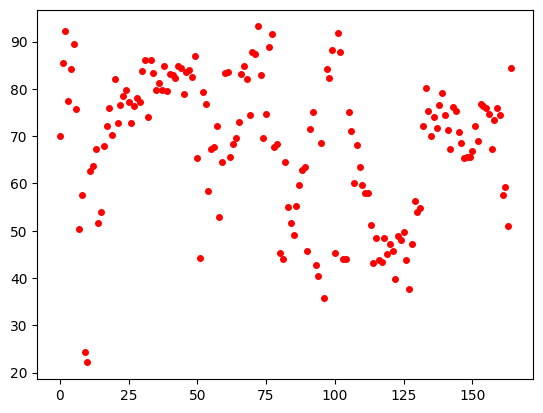

In [4]:

df = pd.read_csv('labelled_images_just_sipa2.txt', sep="\t", header=None)

df.columns = ["image_file", "seen_data_numeric", "fld3", "fld4"]


# List to store the contrasts of the images
contrasts = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # print(filename)

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # print("image -", image, "- ...")

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

# Plot the contrast values using Matplotlib
plt.plot(contrasts, 'ro', markersize=4)

# Add the file names as labels for the points
# for i, filename in enumerate(sipa2_data['image_file'].apply(lambda x: x[0])):
    # plt.text(i, contrasts[i], filename, fontsize=8)

# for i, filename in enumerate(sipa2_data['image_file']):
    # plt.text(i, contrasts[i], filename, fontsize=8)

plt.show()

In [5]:
sipa2_data = pd.read_csv("sipa2_data.csv", index_col=0)

sipa2_data

,image_file,seen_data_numeric,size_used,closing_ssd,closing_eng,mro_ssd,mro_eng
0,['./sipaimages/2/1.jpg'],5679,50,9,NaN,5679,NaN
0,['./sipaimages/2/10.jpg'],2244,50,NaN,NaN,2244,NaN
0,['./sipaimages/2/11.jpg'],2244,50,42,NaN,13531,NaN
0,['./sipaimages/2/12.jpg'],2244,50,NaN,NaN,511,2244
0,['./sipaimages/2/13.jpg'],7244,50,22,NaN,7244,NaN
...,...,...,...,...,...,...,...
0,['./sipaimages/2/5.jpg'],3456,749,NaN,NaN,51,NaN
0,['./sipaimages/2/6.jpg'],6543,749,NaN,NaN,['060080611143888.78106161365118806.9811566771...,['15..']
0,['./sipaimages/2/7.jpg'],1278,749,NaN,NaN,1.0017878008535133e+29,NaN
0,['./sipaimages/2/8.jpg'],1279,749,NaN,NaN,5151,NaN


## Count Analysis

Here we are taking the read analysis of the sipa images and counting the number of times each time the digits were successfully read.

In [6]:



# Get a list of the unique images in the dataframe
unique_images = sipa2_data['image_file'].unique()

# Initialize empty lists to store the counts
closing_ssd_equal_counts = []
closing_ssd_not_equal_counts = []
closing_eng_equal_counts = []
closing_eng_not_equal_counts = []
mro_ssd_equal_counts = []
mro_ssd_not_equal_counts = []
mro_eng_equal_counts = []
mro_eng_not_equal_counts = []

# Iterate over the unique images
for image in unique_images:
   
    # CLOSING

    # Filter the dataframe to include only rows with the current image
    image_df = sipa2_data[sipa2_data['image_file'] == image]
    
    # Count the number of times seen_data_numeric is equal to closing_ssd for the current image
    closing_ssd_equal_count = image_df[image_df['seen_data_numeric'] == image_df['closing_ssd']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to closing_ssd for the current image
    closing_ssd_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['closing_ssd']].shape[0]

    # Count the number of times seen_data_numeric is equal to closing_eng for the current image
    closing_eng_equal_count = image_df[image_df['seen_data_numeric'] == image_df['closing_eng']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to closing_eng for the current image
    closing_eng_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['closing_eng']].shape[0]


    # MRO Counts   
    # Count the number of times seen_data_numeric is equal to mro_ssd for the current image
    mro_ssd_equal_count = image_df[image_df['seen_data_numeric'] == image_df['mro_ssd']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to mro_ssd for the current image
    mro_ssd_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['mro_ssd']].shape[0]

    # Count the number of times seen_data_numeric is equal to mro_eng for the current image
    mro_eng_equal_count = image_df[image_df['seen_data_numeric'] == image_df['mro_eng']].shape[0]
    
    # Count the number of times seen_data_numeric is not equal to mro_eng for the current image
    mro_eng_not_equal_count = image_df[image_df['seen_data_numeric'] != image_df['mro_eng']].shape[0]
    
    # Add the counts to the lists
    closing_ssd_equal_counts.append(closing_ssd_equal_count)
    closing_ssd_not_equal_counts.append(closing_ssd_not_equal_count)
    closing_eng_equal_counts.append(closing_eng_equal_count)
    closing_eng_not_equal_counts.append(closing_eng_not_equal_count)

    mro_ssd_equal_counts.append(mro_ssd_equal_count)
    mro_ssd_not_equal_counts.append(mro_ssd_not_equal_count)
    mro_eng_equal_counts.append(mro_eng_equal_count)
    mro_eng_not_equal_counts.append(mro_eng_not_equal_count)

# Create a new dataframe with the counts as columns
output_df = pd.DataFrame({
    'closing_ssd_equal_count': closing_ssd_equal_counts,
    'closing_ssd_not_equal_count': closing_ssd_not_equal_counts,
    'closing_eng_equal_count': closing_eng_equal_counts,
    'closing_eng_not_equal_count': closing_eng_not_equal_counts,
    'mro_ssd_equal_count': mro_ssd_equal_counts,
    'mro_ssd_not_equal_count': mro_ssd_not_equal_counts,
    'mro_eng_equal_count': mro_eng_equal_counts,
    'mro_eng_not_equal_count': mro_eng_not_equal_counts
}, index=unique_images)

# output_df.insert(0, 'image_file', unique_images.strip('[]'))

stripped_images = [image.strip("[]'") for image in unique_images]
output_df.insert(0, 'image_file', stripped_images)

# Save the output dataframe to a CSV file
output_df.to_csv('sipa2_count_analysis.csv', index=False, header=True)


In [7]:
output_df

,image_file,closing_ssd_equal_count,closing_ssd_not_equal_count,closing_eng_equal_count,closing_eng_not_equal_count,mro_ssd_equal_count,mro_ssd_not_equal_count,mro_eng_equal_count,mro_eng_not_equal_count
['./sipaimages/2/1.jpg'],./sipaimages/2/1.jpg,0,700,0,700,207,493,0,700
['./sipaimages/2/10.jpg'],./sipaimages/2/10.jpg,0,700,0,700,432,268,81,619
['./sipaimages/2/11.jpg'],./sipaimages/2/11.jpg,0,700,0,700,425,275,30,670
['./sipaimages/2/12.jpg'],./sipaimages/2/12.jpg,0,700,0,700,376,324,85,615
['./sipaimages/2/13.jpg'],./sipaimages/2/13.jpg,0,700,0,700,165,535,1,699
...,...,...,...,...,...,...,...,...,...
['./sipaimages/2/5.jpg'],./sipaimages/2/5.jpg,0,700,0,700,382,318,31,669
['./sipaimages/2/6.jpg'],./sipaimages/2/6.jpg,0,700,0,700,0,700,0,700
['./sipaimages/2/7.jpg'],./sipaimages/2/7.jpg,0,700,0,700,0,700,0,700
['./sipaimages/2/8.jpg'],./sipaimages/2/8.jpg,0,700,0,700,300,400,0,700


In [8]:
odf = pd.read_csv('sipa2_count_analysis.csv')

In [21]:
odf

,image_file,closing_ssd_equal_count,closing_ssd_not_equal_count,closing_eng_equal_count,closing_eng_not_equal_count,mro_ssd_equal_count,mro_ssd_not_equal_count,mro_eng_equal_count,mro_eng_not_equal_count
0,./sipaimages/2/1.jpg,0,700,0,700,207,493,0,700
1,./sipaimages/2/10.jpg,0,700,0,700,432,268,81,619
2,./sipaimages/2/11.jpg,0,700,0,700,425,275,30,670
3,./sipaimages/2/12.jpg,0,700,0,700,376,324,85,615
4,./sipaimages/2/13.jpg,0,700,0,700,165,535,1,699
...,...,...,...,...,...,...,...,...,...
160,./sipaimages/2/5.jpg,0,700,0,700,382,318,31,669
161,./sipaimages/2/6.jpg,0,700,0,700,0,700,0,700
162,./sipaimages/2/7.jpg,0,700,0,700,0,700,0,700
163,./sipaimages/2/8.jpg,0,700,0,700,300,400,0,700


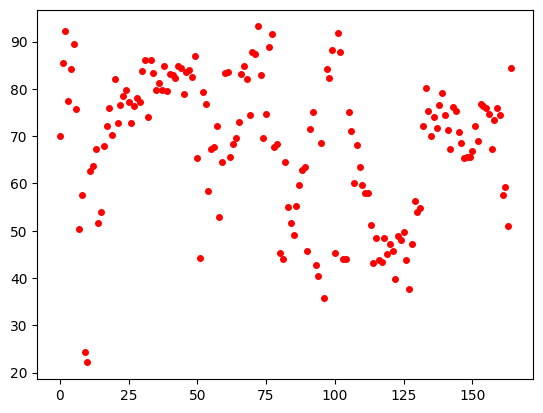

In [9]:

df = pd.read_csv('sipa2_count_analysis.csv')


# List to store the contrasts of the images
contrasts = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

# Plot the contrast values using Matplotlib
plt.plot(contrasts, 'ro', markersize=4)


plt.show()

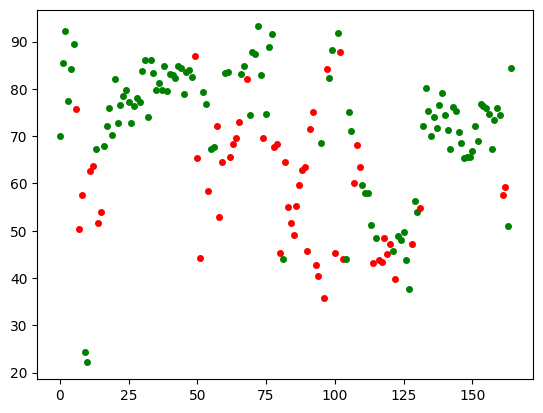

In [10]:
df = pd.read_csv('sipa2_count_analysis.csv')

# List to store the contrasts of the images
contrasts = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

    # Check if mro_ssd_equal_count is greater than 0
    if row['mro_ssd_equal_count'] > 0:
        # If it is, plot the dot in green
        plt.plot(index, contrast, 'go', markersize=4)
    else:
        # Otherwise, plot the dot in red
        plt.plot(index, contrast, 'ro', markersize=4)

plt.show()


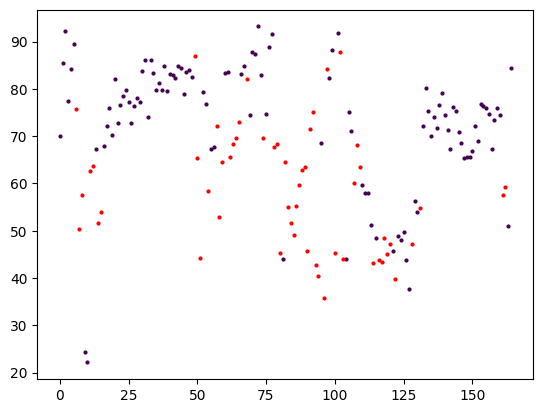

In [11]:
df = pd.read_csv('sipa2_count_analysis.csv')

# List to store the contrasts of the images
contrasts = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

    # Check if mro_ssd_equal_count is greater than 0
    if row['mro_ssd_equal_count'] > 0:
        # If it is, plot the dot in green with a gradient
        plt.scatter(index, contrast, c=row['mro_ssd_equal_count'], cmap='viridis', marker='o', s=4)
    else:
        # Otherwise, plot the dot in red
        plt.plot(index, contrast, 'ro', markersize=2)

plt.show()


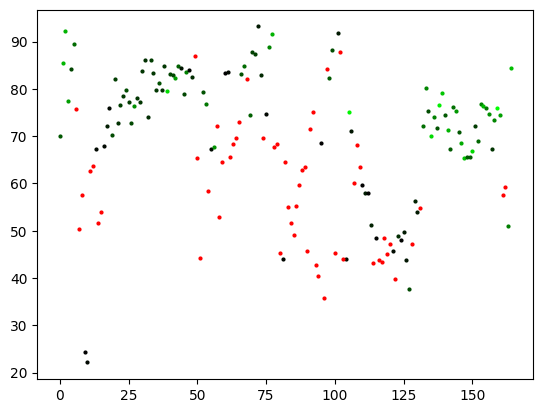

In [30]:
df = pd.read_csv('sipa2_count_analysis.csv')

# List to store the contrasts of the images
contrasts = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

    # Check if mro_ssd_equal_count is greater than 0
    if row['mro_ssd_equal_count'] > 0:
        # If it is, plot the dot in green with a gradient
        plt.scatter(index, contrast, color=(0, row['mro_ssd_equal_count']/max(df['mro_ssd_equal_count']), 0), marker='o', s=4)
    else:
        # Otherwise, plot the dot in red
        plt.plot(index, contrast, 'ro', markersize=2)

plt.show()


## Sipa2 Contrast mro_ssd

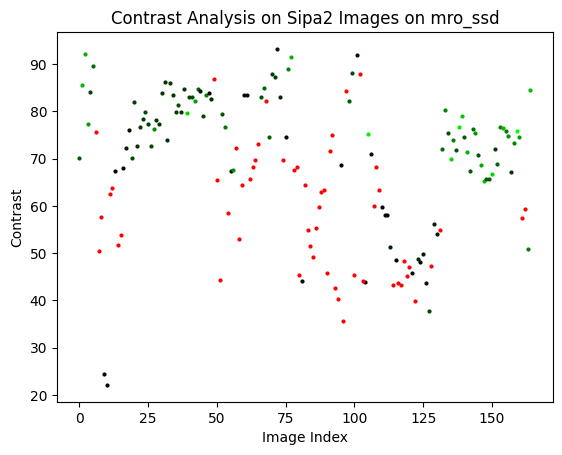

In [13]:
df = pd.read_csv('sipa2_count_analysis.csv')

# List to store the contrasts of the images
contrasts = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

    # Check if mro_ssd_equal_count is greater than 0
    if row['mro_ssd_equal_count'] > 0:
        # If it is, plot the dot in green with a gradient
        plt.scatter(index, contrast, color=(0, row['mro_ssd_equal_count']/max(df['mro_ssd_equal_count']), 0), marker='o', s=4)
    else:
        # Otherwise, plot the dot in red
        plt.plot(index, contrast, 'ro', markersize=2)


# Add labels to the x and y axis
plt.xlabel('Image Index')
plt.ylabel('Contrast')
plt.title("Contrast Analysis on Sipa2 Images on mro_ssd")

plt.show()


## Contrast Analysis on Sipa2 Images

The Contrast Analysis on Sipa2 Images graph shown above displays the contrast of the images within the Sipa2 folder.

The y-axis of the plot represents the contrast of each image in the Sipa 2 folder. The contrast of an image is a measure of the intensity difference between the light and dark pixels in the image. It is computed by calculating the standard deviation of the pixel intensities of the image.

In the loop, the contrast value is computed for each image and added to the list contrasts. This value is then plotted on the y axis along with the index of the image, which is represented by the variable index.

For example, if the first image has a contrast value of 100 and an index of 0, it will be plotted at the point (0, 100) on the x-y plane. If the second image has a contrast value of 200 and an index of 1, it will be plotted at the point (1, 200), and so on.

The y axis label 'Contrast' simply indicates that the y axis represents the contrast values of the images in the dataframe.

## Sipa2 Contrast mro_eng

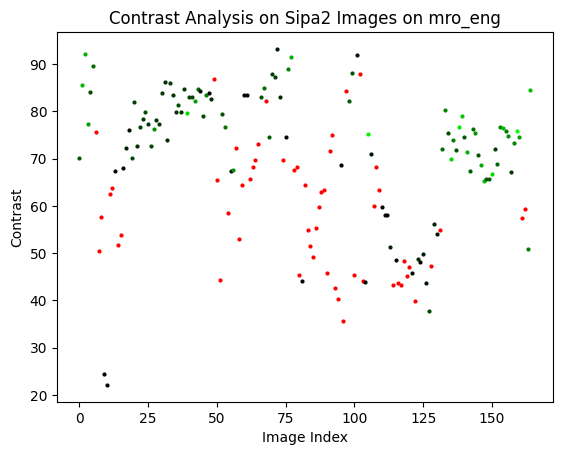

In [88]:
df = pd.read_csv('sipa2_count_analysis.csv')

# List to store the contrasts of the images
contrasts = []

# Create a figure and a subplot
fig, ax = plt.subplots()

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

    # Check if mro_ssd_equal_count is greater than 0
    if row['mro_ssd_equal_count'] > 0:
        # If it is, plot the dot in green with a gradient
        ax.scatter(index, contrast, color=(0, row['mro_ssd_equal_count']/max(df['mro_ssd_equal_count']), 0), marker='o', s=4, label='mro_ssd_equal_count > 0')
    else:
        # Otherwise, plot the dot in red
        ax.scatter(index, contrast, color='r', marker='o', s=4, label='mro_ssd_equal_count = 0')

# Add labels to the x and y axis
plt.xlabel('Image Index')
plt.ylabel('Contrast')
plt.title("Contrast Analysis on Sipa2 Images on mro_eng")
# Add a legend to the graph
# ax.legend(loc='lower right')

plt.show()



## Sipa2 Contrast closing_ssd

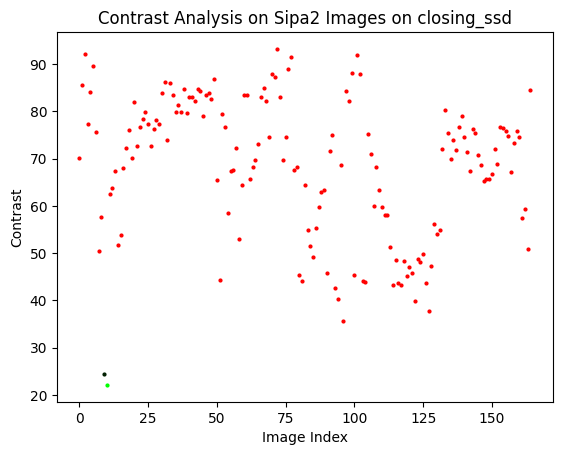

In [83]:
df = pd.read_csv('sipa2_count_analysis.csv')

# List to store the contrasts of the images
contrasts = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

    # Check if closing_ssd_equal_count is greater than 0
    if row['closing_ssd_equal_count'] > 0:
        # If it is, plot the dot in green with a gradient
        plt.scatter(index, contrast, color=(0, row['closing_ssd_equal_count']/max(df['closing_ssd_equal_count']), 0), marker='o', s=4)
    else:
        # Otherwise, plot the dot in red
        plt.plot(index, contrast, 'ro', markersize=2)

# Add labels to the x and y axis
plt.xlabel('Image Index')
plt.ylabel('Contrast')
plt.title("Contrast Analysis on Sipa2 Images on closing_ssd")

plt.show()

## Sipa2 Contrast closing_eng

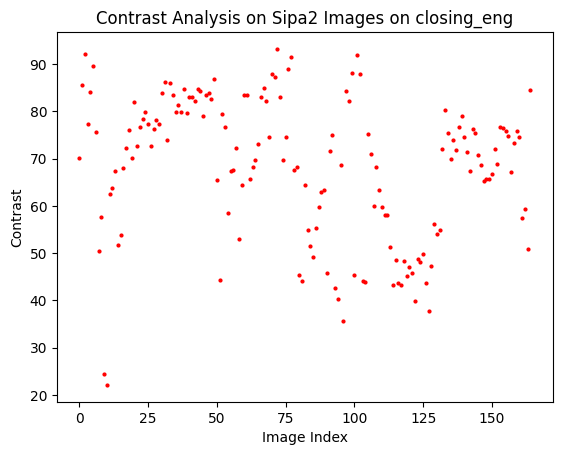

In [84]:
df = pd.read_csv('sipa2_count_analysis.csv')

# List to store the contrasts of the images
contrasts = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # Extract the file name from the list
    filename = row['image_file']

    # Load the image using OpenCV
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the contrast of the image by calculating the standard deviation of the pixel intensities
    contrast = cv2.meanStdDev(gray_image)[1][0][0]

    # Add the contrast value to the list
    contrasts.append(contrast)

    # Check if closing_eng_equal_count is greater than 0
    if row['closing_eng_equal_count'] > 0:
        # If it is, plot the dot in green with a gradient
        plt.scatter(index, contrast, color=(0, row['closing_eng_equal_count']/max(df['closing_eng_equal_count']), 0), marker='o', s=4)
    else:
        # Otherwise, plot the dot in red
        plt.plot(index, contrast, 'ro', markersize=2)

# Add labels to the x and y axis
plt.xlabel('Image Index')
plt.ylabel('Contrast')
plt.title("Contrast Analysis on Sipa2 Images on closing_eng")

plt.show()